In [15]:
import numpy as np
import pandas as pd
import seaborn as sb

In [55]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [56]:
X = pd.DataFrame(X)

In [57]:
X.columns = ["X1", "X2"]
X.head(2)

,X1,X2
0,0.836857,2.136359
1,-1.413658,7.409623


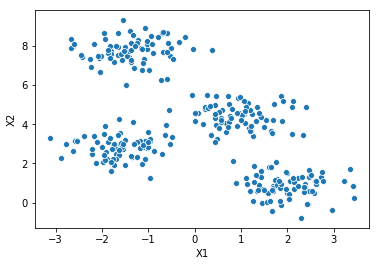

In [58]:
sb.scatterplot(data=X, x="X1", y="X2")

In [66]:
from sklearn.cluster import KMeans

In [67]:
KMeans = KMeans(n_clusters=4, random_state=0)
KMeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [68]:
X.head()

,X1,X2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


In [71]:
X_con_cluster =pd.concat([X, pd.DataFrame(KMeans.labels_)], axis=1)

In [72]:
X_con_cluster.columns = ["X1", "X2", "Cluster"]

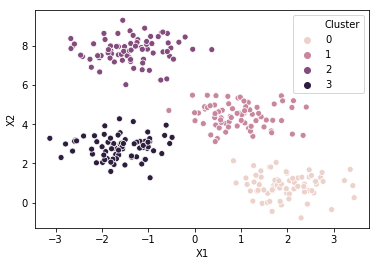

In [73]:
sb.scatterplot(data=X_con_cluster, x="X1", y="X2", hue="Cluster")

In [83]:
centroides = pd.DataFrame(KMeans.cluster_centers_)
centroides.columns = ["X1", "X2"]
centroides["Cluster"] = 4

In [84]:
X_con_centroides = pd.concat([X_con_cluster, centroides], ignore_index=True)

In [85]:
X_con_centroides.tail()

,X1,X2,Cluster
299,-1.791458,2.749669,3
300,1.982583,0.867713,4
301,0.949735,4.419069,4
302,-1.373244,7.753689,4
303,-1.584385,2.830813,4


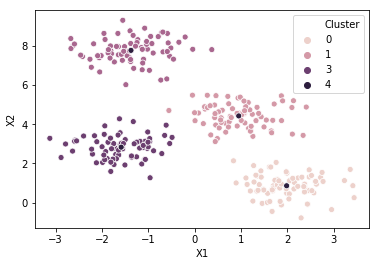

In [87]:
sb.scatterplot(data=X_con_centroides, x="X1", y="X2", hue="Cluster")

In [88]:
KMeans.inertia_

212.00599621083478

In [94]:
K_estudio = list(range(1, 10))
        

In [97]:
from sklearn.cluster import KMeans

In [99]:
metodo_codo = []
for k in K_estudio:
    kmeans=KMeans(n_clusters=k).fit(X)
    metodo_codo.append([k, kmeans.inertia_])
    

In [100]:
from sklearn.datasets import make_moons
X_m, y= make_moons(200, noise=.05, random_state=0)

In [101]:
from sklearn import datasets
iris = datasets.load_iris()

In [102]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [108]:
df_iris = pd.DataFrame(iris["data"])

In [109]:
df_iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [110]:
df_iris.columns= ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [115]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [116]:
kmeans_iris = KMeans(n_clusters=4, random_state=0)
kmeans_iris.fit(df_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [119]:
kmeans_iris.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [121]:
#X_con_cluster =pd.concat([X, pd.DataFrame(KMeans.labels_)], axis=1)

#iris_cluster = pd.concat([df_iris, pd.DataFrame(kmeans_iris.labels_)]. axis=1)

In [122]:
K_estudio = list(range(1, 10))
metodo_codo = []
for k in K_estudio:
    kmeans_iris=KMeans(n_clusters=k).fit(df_iris)
    metodo_codo.append([k, kmeans_iris.inertia_])

In [123]:
valores_codo = pd.DataFrame(metodo_codo)
valores_codo.columns=["K", "SSE"]

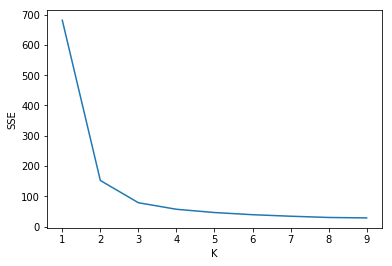

In [125]:
sb.lineplot(data=valores_codo, x="K", y="SSE")

In [132]:
kmeans_iris3 = KMeans(n_clusters=3, random_state=0)
kmeans_iris3.fit(df_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [133]:
iris_con_cluster =pd.concat([df_iris, pd.DataFrame(kmeans_iris3.labels_)], axis=1)
iris_con_cluster.columns= ["X1", "X2", "X3","X4", "Cluster"]

In [134]:
from sklearn.metrics import silhouette_score

In [136]:
silhouette_score(df_iris, kmeans_iris3.labels_)

0.5528190123564091

In [144]:
K_estudio = list(range(2, 10))
metodo_silhouette = []
for k in K_estudio:
    kmeans_iris_k=KMeans(n_clusters=k).fit(df_iris)
    metodo_silhouette.append([k, silhouette_score(df_iris, kmeans_iris_k.labels_)])

In [147]:
valores_silhoutte = pd.DataFrame(metodo_silhouette)
valores_silhoutte.columns=["k", "sil"]

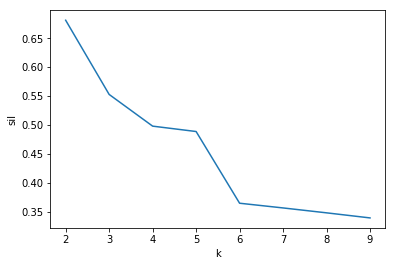

In [148]:
sb.lineplot(data=valores_silhoutte, x="k", y="sil")